# 1. Preliminaries

## 1.1. Import the necessary libraries

In [1]:
# Import PyTorch
import torch

# Import torchvision.datasets to get the full PCAM dataset
from torchvision import datasets

# Uncomment the following line if torchvision.transforms is needed to transform PIL images to tensor and vice versa
# import torchvision.transforms as transforms

# We use Counter() to get the frequencies of data labeled 0 and 1 in a subset of the PCAM dataset 
from collections import Counter

# To make a random selection
import random

# To create directories
import os
import pathlib

In [2]:
# Check PyTorch version
torch.__version__

'2.4.0'

## 1.2 Make data directory

In [3]:
# Setup data directory
data_dir = pathlib.Path("./data")

# 2. Get the PCAM dataset and check the format

In [4]:
# Get training data
train_data = datasets.PCAM(root=data_dir,
                              split="train",
                              #transform=transforms.ToTensor(),
                              download=True)

# Get testing data
test_data = datasets.PCAM(root=data_dir,
                             split="test",
                             #transform=transforms.ToTensor(),
                             download=True)

In [5]:
# Dataset information, number of datapoints, etc.
train_data, test_data

(Dataset PCAM
     Number of datapoints: 262144
     Root location: data,
 Dataset PCAM
     Number of datapoints: 32768
     Root location: data)

In [6]:
# Number of datapoints
len(train_data), len(test_data)

(262144, 32768)

In [7]:
# What does each entry of the dataset look like? 
# It's a pair of things: a PIL image and a binary digit, namely 0 or 1.
train_data[0]

(<PIL.Image.Image image mode=RGB size=96x96>, 0)

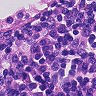

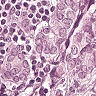

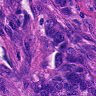

In [8]:
# Have a look at the first 3 images
display(train_data[0][0]), display(train_data[1][0]), display(train_data[2][0]);

In [9]:
# First 3 labels
train_data[0][1], train_data[1][1], train_data[2][1]

(0, 1, 1)

In [10]:
# Now, let's check how many images are labeled 0 and how many are labeled 1.
# Instead of looking at the whole train dataset, we have a look at a few entries from the start

RANGE_OF_A_FEW_ENTRIES_FROM_START = 1000
train_labels_of_a_few_entries_from_start = []
for i in range(RANGE_OF_A_FEW_ENTRIES_FROM_START):
    train_labels_of_a_few_entries_from_start.append(train_data[i][1])

Counter(train_labels_of_a_few_entries_from_start)

Counter({1: 520, 0: 480})

In [11]:
# How many images are labeled 1 and 0, respectively, in the test dataset?
# We can have an estimate for the whole test dataset, since it's relatively small.

test_labels = []
for i in range(len(test_data)):
    test_labels.append(test_data[i][1])
Counter(test_labels)

Counter({0: 16391, 1: 16377})

# 3. Make the subset

## 3.1. Transform the train and test dataset into lists
If the dataset is in a sequence format, we can use the `random.sample()` library function

In [12]:
# Transform the train dataset into a list, for easy random sampling. This might take some time, depending on the computing resources available
train_list = list(train_data)

In [13]:
# Transform the test dataset into a list, for easy random sampling.
test_list = list(test_data)

## 3.2. Randomly sample a subset of roughly 10% size of the original dataset 

In [14]:
# Set a seed for reproducibility of results
SEED = 57
random.seed(SEED)

In [15]:
SUBSET_RELATIVE_SIZE = 0.1 # For 10% size of the original dataset

# A function that returns a randomly sampled subset
def random_subset_sample(
        data_list,
        amount = SUBSET_RELATIVE_SIZE,
):
    return random.sample(data_list, round(amount*len(data_list)))

In [16]:
train_subset = random_subset_sample(train_list)
test_subset = random_subset_sample(test_list)

In [17]:
# Check whether the frequencies of labels 0 and 1 are representatives of the frequencies in the original train and test datasets. 
# We are aiming for roughly 50% of 1's and 50% of 0's, based on the original.

train_subset_labels = []
for i in range(len(train_subset)):
    train_subset_labels.append(train_subset[i][1])

test_subset_labels = []
for i in range(len(test_subset)):
    test_subset_labels.append(test_subset[i][1])

Counter(train_subset_labels), Counter(test_subset_labels)

(Counter({1: 13117, 0: 13097}), Counter({1: 1668, 0: 1609}))

## 3.3. Save the train and test subsets

We are aiming at the following folder structure inside the `/data` directory:

```
└── 📁PCAM_Subset
    └── 📁test
        └── 📁0
            └── 1.jpg
            └── 2.jpg
            └── ...
        └── 📁1
            └── 0.jpg
            └── 3.jpg
            └── ...
    └── 📁train
        └── 📁0
            └── 1.jpg
            └── 4.jpg
            └── 6.jpg
            └── ...
        └── 📁1
            └── 0.jpg
            └── 2.jpg
            └── 3.jpg
            └── ...
```


In [18]:
subset_path = data_dir/"PCAM_Subset"
def save_images(
        data_subset: list,
        split # train or test
):
    image_dir_0 = pathlib.Path(subset_path/split/"0")
    image_dir_1 = pathlib.Path(subset_path/split/"1")
    
    if not os.path.exists(image_dir_0):
        os.makedirs(image_dir_0)
    if not os.path.exists(image_dir_1):
        os.makedirs(image_dir_1)
    
    for i in range(len(data_subset)):
        image_name = str(i)+".jpg"
        image = data_subset[i][0]
        label = data_subset[i][1]
        if label == 0:
            image.save(image_dir_0/image_name)
        else:
            image.save(image_dir_1/image_name)

In [19]:
save_images(train_subset, "train")
save_images(test_subset, "test")